<a href="https://colab.research.google.com/github/max1nehour/Boosting-ML-in-AMR-Prediction/blob/main/FS_ADAB(neisseria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/wulab_final

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',10)

# 函式

In [ ]:
def print_feature(model):
  features= []
  plt.figure(figsize=(10,6))
  plt.rcParams["figure.figsize"] = (10,20)
  plot_importance(model,max_num_features=100)
  for i in model.feature_importances_:
    if i > 0:
      features.append(i)
  print('特徵重要程度數量: ',len(features))

# 建立測試集的 DataFrme
def toDF (model,X_test,y_test):
  df_test=pd.DataFrame(X_test)
  df_test['Resistant'] = y_test
  pred = model.predict(X_test)
  df_test['Predict'] = pred
  #print(df_test)
  return pred

def line_plot(y_test,pred, drug):
  x = np.arange(len(y_test))

  plt.figure(figsize=(10, 6))
  # Plot true labels and predicted labels
  plt.plot(x, y_test, 'bo-', label='True Label')
  plt.plot(x, pred, 'cx-', label='Predicted Label')

# Add labels and title
  plt.xlabel('Sample Index')
  plt.ylabel('Label')
  plt.title('True vs Predicted Labels ({})'.format(drug))
  plt.legend()  # Show legend
  plt.show()

def heatmap(y_test,pred,drug):
  # Combine true labels and predicted labels into a matrix
  matrix = np.array([y_test, pred])
  plt.figure(figsize=(10, 6))
  # Create a heatmap using Seaborn
  sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d', xticklabels=['True Label', 'Predicted Label'])
  plt.xlabel('Index')
  plt.ylabel('Label')
  plt.title('True vs Predicted Labels - Heatmap({})'.format(drug))
  plt.show()

def keytrans(key,x):
  newkey = (int(i[1:]) for i in key)
  #print("newkey", newkey)
  f_names= []
  for i in newkey:
    f_names.append(x[i])
    #print("f_names", f_names)

  return f_names


def print_feature(model):
  features = model.feature_importances_
  # Get column names and convert to list
  genes = df_data.columns.tolist()
  gene_list = genes[1:]

  # Filter out features with very small importances
  threshold = 0.01  # Set a threshold to filter out unimportant features
  indices = np.where(features > threshold)[0]
  filtered_importances = features[indices]
  filtered_feature_names = np.array(gene_list)[indices]

  # Sort by importance
  sorted_idx = np.argsort(filtered_importances)[::-1]
  filtered_importances = filtered_importances[sorted_idx]
  filtered_feature_names = filtered_feature_names[sorted_idx]

  # Plot the histogram
  plt.figure(figsize=(10, 6))
  plt.barh(filtered_feature_names, filtered_importances, color='skyblue')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importances')
  plt.show()

## 1) 載入資料集

<ipython-input-7-8065b43847bf>:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

---------------tetracycline-----------------
Strain    Resistant Gene_0 Gene_1 Gene_1000 Gene_10000 Gene_10001 Gene_10004  \
485.3083          1      1      1         0          0          0          0   
485.3084          0      1      1         0          0          0          0   
485.3085          0      1      1         0          0          0          0   
485.3086          0      1      1         0          0          0          0   
485.3087          0      1      1         0          0          0          0   
...             ...    ...    ...       ...        ...        ...        ...   
485.869           0      1      1         0          0          0          0   
485.870           0      1      1         0          0          0          0   
485.871           0      1      1         0          0          0          0   
485.873           0      1      0         0          0          0          0   
485.874           0      1      0         0          0          0          

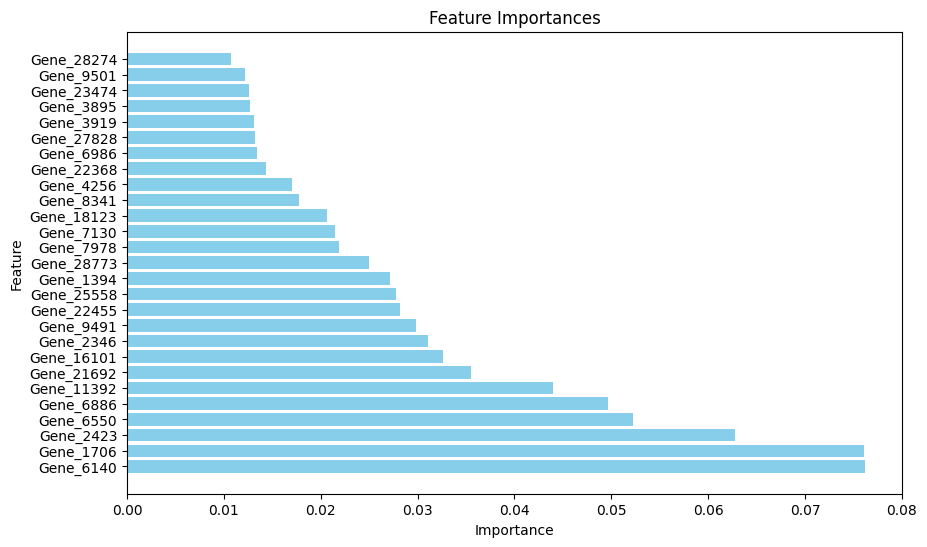

n: 1
Thresh=0.076, n=1, Accuracy: 86.11%
n: 2
Thresh=0.076, n=2, Accuracy: 86.11%
n: 3
Thresh=0.063, n=3, Accuracy: 86.11%
n: 4
Thresh=0.052, n=4, Accuracy: 87.50%
n: 5
Thresh=0.050, n=5, Accuracy: 87.50%
n: 6
Thresh=0.044, n=6, Accuracy: 91.67%
n: 7
Thresh=0.036, n=7, Accuracy: 88.89%
n: 8
Thresh=0.033, n=8, Accuracy: 88.89%
n: 9
Thresh=0.031, n=9, Accuracy: 93.06%
n: 10
Thresh=0.030, n=10, Accuracy: 93.06%
n: 11
--------------------REPORT: tetracycline---------------------

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.95      0.93      0.94        43

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72

---------------erythromycin-----------------


<ipython-input-7-8065b43847bf>:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  antibiotics = pd.read_csv('/content/drive/MyDrive/neisseria/{}.txt'.format(i), delimiter='\t',header =0,index_col =0,encoding = 'utf-8') #header=1讓第二行作為欄位抬頭


Strain    Resistant Gene_0 Gene_1 Gene_10001 Gene_10004 Gene_10005 Gene_10011  \
485.3083          1      1      1          0          0          0          0   
485.696           1      1      0          0          0          0          0   
485.697           1      1      1          0          0          0          0   
485.698           1      1      0          0          0          0          0   
485.699           1      1      1          0          0          0          0   
...             ...    ...    ...        ...        ...        ...        ...   
485.869           0      1      1          0          0          0          0   
485.870           0      1      1          0          0          0          0   
485.871           0      1      1          0          0          0          0   
485.873           0      1      0          0          0          0          0   
485.874           0      1      0          0          0          0          0   

Strain   Gene_10017 Gene_10

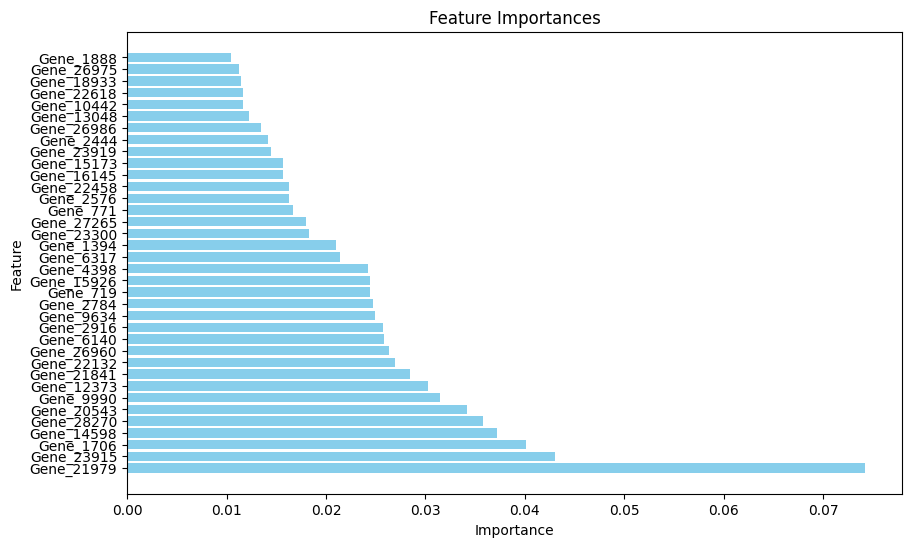

n: 1
Thresh=0.074, n=1, Accuracy: 55.56%
n: 2
Thresh=0.043, n=2, Accuracy: 63.89%
n: 3
Thresh=0.040, n=3, Accuracy: 83.33%
n: 4
Thresh=0.037, n=4, Accuracy: 83.33%
n: 5
Thresh=0.036, n=5, Accuracy: 80.56%
n: 6
Thresh=0.034, n=6, Accuracy: 75.00%
n: 7
Thresh=0.031, n=7, Accuracy: 77.78%
n: 8
Thresh=0.030, n=8, Accuracy: 75.00%
n: 9
Thresh=0.028, n=9, Accuracy: 72.22%
n: 10
Thresh=0.027, n=10, Accuracy: 69.44%
n: 11
--------------------REPORT: erythromycin---------------------

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.74      0.70      0.72        20

    accuracy                           0.69        36
   macro avg       0.69      0.69      0.69        36
weighted avg       0.70      0.69      0.70        36



<ipython-input-7-8065b43847bf>:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

---------------ciprofloxacin-----------------
Strain    Resistant Gene_0 Gene_1 Gene_1000 Gene_10000 Gene_10001 Gene_10004  \
485.3083          1      1      1         0          0          0          0   
485.3084          1      1      1         0          0          0          0   
485.3085          1      1      1         0          0          0          0   
485.3086          1      1      1         0          0          0          0   
485.3087          1      1      1         0          0          0          0   
485.3331          1      1      1         0          0          0          0   
485.697           1      1      1         0          0          0          0   
485.698           0      1      0         0          0          0          0   
485.699           0      1      1         0          0          0          0   
485.700           0      1      1         0          0          0          0   
485.702           0      1      1         0          0          0         

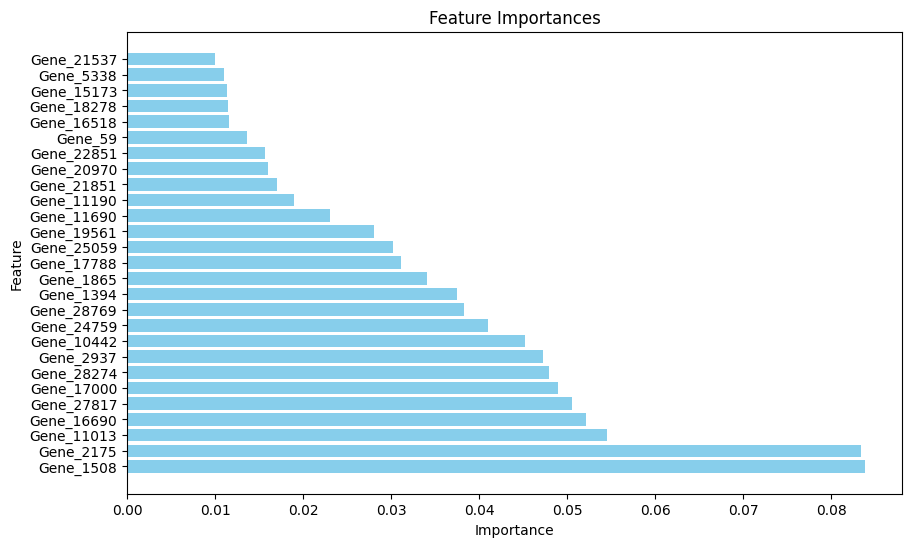

n: 1
Thresh=0.084, n=1, Accuracy: 70.59%
n: 2
Thresh=0.083, n=2, Accuracy: 82.35%
n: 3
Thresh=0.055, n=3, Accuracy: 94.12%
n: 4
Thresh=0.052, n=4, Accuracy: 100.00%
n: 5
Thresh=0.051, n=5, Accuracy: 94.12%
n: 6
Thresh=0.049, n=6, Accuracy: 94.12%
n: 7
Thresh=0.048, n=7, Accuracy: 88.24%
n: 8
Thresh=0.047, n=8, Accuracy: 88.24%
n: 9
Thresh=0.045, n=9, Accuracy: 88.24%
n: 10
Thresh=0.041, n=10, Accuracy: 88.24%
n: 11
--------------------REPORT: ciprofloxacin---------------------

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.83      0.91        12

    accuracy                           0.88        17
   macro avg       0.86      0.92      0.87        17
weighted avg       0.92      0.88      0.89        17



<ipython-input-7-8065b43847bf>:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

---------------azithromycin-----------------
Strain    Resistant Gene_0 Gene_1 Gene_1000 Gene_10000 Gene_10001 Gene_10003  \
485.291           1      1      0         0          0          0          0   
485.292           1      1      0         0          0          0          0   
485.294           1      1      1         0          0          0          0   
485.295           1      1      0         0          0          0          0   
485.298           1      1      0         0          0          0          0   
...             ...    ...    ...       ...        ...        ...        ...   
485.9741          0      1      0         0          0          0          0   
485.9742          0      1      1         0          0          0          0   
485.9743          0      1      0         0          0          0          0   
485.9744          0      1      0         0          0          0          0   
485.9745          0      1      0         0          0          0          

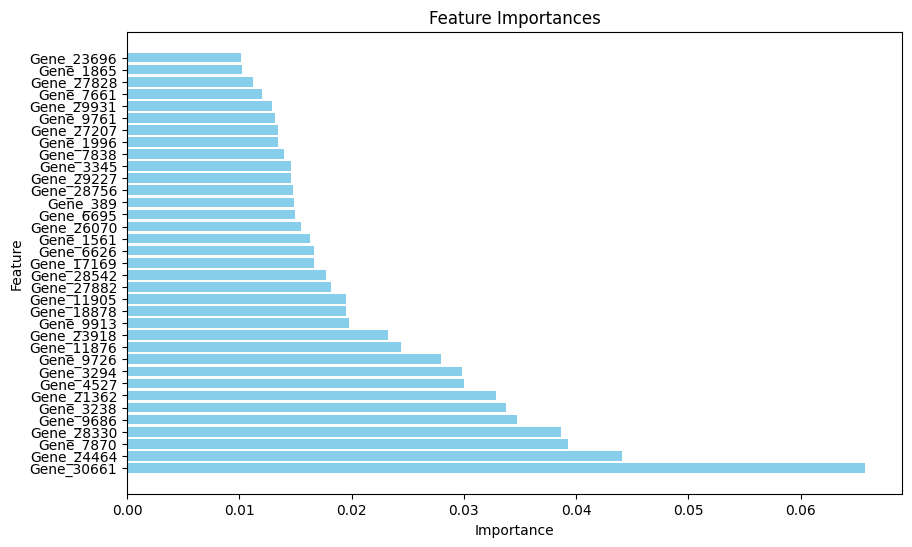

n: 1
Thresh=0.066, n=1, Accuracy: 65.57%
n: 2
Thresh=0.044, n=2, Accuracy: 71.58%
n: 3
Thresh=0.039, n=3, Accuracy: 80.33%
n: 4
Thresh=0.039, n=4, Accuracy: 87.98%
n: 5
Thresh=0.035, n=5, Accuracy: 90.71%
n: 6
Thresh=0.034, n=6, Accuracy: 92.35%
n: 7
Thresh=0.033, n=7, Accuracy: 92.35%
n: 8
Thresh=0.030, n=8, Accuracy: 92.35%
n: 9
Thresh=0.030, n=9, Accuracy: 93.99%
n: 10
Thresh=0.028, n=10, Accuracy: 93.99%
n: 11
--------------------REPORT: azithromycin---------------------

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       120
           1       0.89      0.94      0.91        63

    accuracy                           0.94       183
   macro avg       0.93      0.94      0.93       183
weighted avg       0.94      0.94      0.94       183



In [ ]:
#discovered: linezolid has 0 resistant to any strains ＃170
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from numpy import sort
from statistics import mean
from scipy.stats import chi2_contingency
np.set_printoptions(threshold = np.inf)

drugs = ['tetracycline','erythromycin','ciprofloxacin','azithromycin']

for i in drugs:
  drug = i
  antibiotics = pd.read_csv('/content/drive/MyDrive/neisseria/{}.txt'.format(i), delimiter='\t',header =0,index_col =0,encoding = 'utf-8') #header=1讓第二行作為欄位抬頭
  antibiotics = antibiotics.transpose()
  #antibiotics.to_csv('/content/drive/MyDrive/neisseria/{}.csv'.format(i))
  print("---------------{}-----------------".format(i))
  antibiotics.replace('R',1, inplace = True)
  antibiotics.replace('S',0, inplace = True)

  df_data = pd.DataFrame(data= antibiotics)
  # Drop rows with any NaN values
  df_data = df_data.dropna()
  #print(df_data)
  header_list = df_data.columns.tolist()

  #check out data info & statistical description
  #df_data.info()
  #df_data.describe()
  #統計分析
  resistance = df_data['Resistant']
  genes = df_data.drop(labels=['Resistant'],axis=1)
  # 結果存放
  results = []

    # 對每個基因進行卡方檢定
  for gene in genes.columns:
      contingency_table = pd.crosstab(resistance, genes[gene])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      results.append((gene, chi2, p))

    # 結果轉為DataFrame
  results_df = pd.DataFrame(results, columns=['Gene', 'Chi2', 'P-value'])
  #results_df.to_csv('/content/drive/My Drive/wulab_final/{}_chi-square.csv'.format(i))

    # 多重檢定校正（如Bonferroni）
  results_df['Adjusted P-value'] = results_df['P-value'] * len(genes.columns)
  results_df['Significant'] = results_df['Adjusted P-value'] < 0.05

    # 顯示顯著基因
  significant_genes = results_df[results_df['Significant']]
  print(significant_genes)

  #Define Input/ Output (array type)
  X = df_data.drop(labels=['Resistant'],axis=1).values
  y = df_data['Resistant'].values

  #define train, test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify =y)
  #statsitics count
  train_r = np.count_nonzero(y_train == 1)
  train_s = np.count_nonzero(y_train == 0)
  test_r = np.count_nonzero(y_test == 1)
  test_s = np.count_nonzero(y_test == 0)
  print("train:", train_r)
  stat_train = pd.DataFrame( [[int(train_r),int(train_s)]],columns=['Resistant', 'Susceptible'])
  stat_test = pd.DataFrame( [[int(test_r), int(test_s)]],columns=['Resistant', 'Susceptible'])
  print(stat_train)
  print(stat_test)

  #Fit Model
  adamodel = AdaBoostClassifier(n_estimators=300, algorithm="SAMME",learning_rate =0.3)
  adamodel.fit(X_train, y_train)
  print_feature(adamodel)

  #prediction
  y_pred = adamodel.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)


  # Fit model using each importance as a threshold
  thresholds = sort(adamodel.feature_importances_ )[::-1]

  n=1
  fs = []
  for thresh in thresholds:
    print("n:", n)
    if n > 10 :
      break
    # select features using threshold
    selection = SelectFromModel(adamodel, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # train model
    selection_model = AdaBoostClassifier()
    selection_model.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    fs.append((thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    n+=1

  # 結果轉為DataFrame

  fs_df = pd.DataFrame(fs, columns=['Thresh', 'Feature Counts', 'Accuracy'])
  fs_df.to_csv('/content/drive/My Drive/neisseria/ada_{}_fs.csv'.format(i))


  #評估報表
  print('--------------------REPORT: {}---------------------\n'.format(i))
  print(classification_report(y_test, predictions))

# **Statistics**